In [1]:
'''
A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import glob
import pickle

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:


# Parameters
learning_rate = 1e-4
training_epochs = 1000
display_step = 50

files = glob.glob('/home/sameh/distance_data/*.p')
data = dict()
for f in files:
    data.update(pickle.load(open(f, 'rb')))

_X = []
_Y = []

for time, _data in data.items():
   _X.append(_data['signal_level'])
   _Y.append(_data['distance_cm']) 


_X_train = _X[:int(.7*len(_X))]
_Y_train = _Y[:int(.7*len(_X))]

_X_test = _X[int(.7*len(_X)):]
_Y_test = _Y[int(.7*len(_X)):]


test_X = np.array(_X_test)
test_Y = np.array(_Y_test)
    
# Training Data
train_X = np.array(_X_train)
train_Y = np.array(_Y_train)

n_samples = train_X.shape[0]

print("num samples {}".format(n_samples))

# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# %% Instead of a single factor and a bias, we'll create a polynomial function
# of different polynomial degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 3):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# Mean squared error
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_samples - 1)

# cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Initializing the variables
# init = tf.global_variables_initializer()

#Create a saver object which will save all the variables
saver = tf.train.Saver()

num samples 6402


In [3]:
sess = tf.Session()
    
sess.run(tf.global_variables_initializer())

# Fit all training data
prev_training_cost = 0.0
for epoch_i in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})
    training_cost = sess.run(
        cost, feed_dict={X: train_X, Y: train_Y})
        
    if epoch_i % 20 == 0:
        print(training_cost)
            

202838.0
1.16069
1.01955
1.01669
1.01398
1.01129
1.0086
1.00591
1.00322
1.00054
0.997875
0.995206
0.992549
0.989894
0.987248
0.984603
0.981968
0.979335
0.976698
0.974078
0.97146
0.968852
0.966243
0.963647
0.961055
0.95846
0.95588
0.9533
0.950734
0.948166
0.9456
0.943055
0.940506
0.937959
0.935426
0.932888
0.930364
0.92785
0.925336
0.922822
0.920318
0.917824
0.915334
0.912847
0.91037
0.907893
0.905425
0.902965
0.90051
0.898057


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


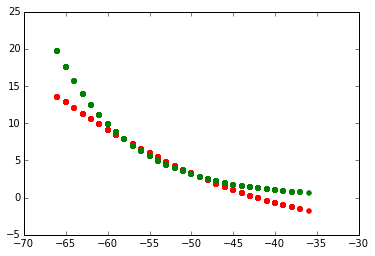

In [4]:
plt.scatter(test_X, Y_pred.eval(feed_dict={X: test_X}, session=sess), color='r')
plt.scatter(test_X, test_Y, color='g')
plt.show()